In [1]:
import pandas as pd
from datetime import datetime
import numpy as np 
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [2]:
SPY_data = pd.read_csv("SPY_regression.csv")
 
# Change the Date column from object to datetime object 
SPY_data["Date"] = pd.to_datetime(SPY_data["Date"])
 
# Preview the data
SPY_data.head(10)

Date         Open         High          Low        Close  \
0 2015-12-07  2090.419922  2090.419922  2066.780029  2077.070068   
1 2015-12-04  2051.239990  2093.840088  2051.239990  2091.689941   
2 2015-12-03  2080.709961  2085.000000  2042.349976  2049.620117   
3 2015-12-02  2101.709961  2104.270020  2077.110107  2079.510010   
4 2015-12-01  2082.929932  2103.370117  2082.929932  2102.629883   
5 2015-11-30  2090.949951  2093.810059  2080.409912  2080.409912   
6 2015-11-27  2088.820068  2093.290039  2084.129883  2090.110107   
7 2015-11-25  2089.300049  2093.000000  2086.300049  2088.870117   
8 2015-11-24  2084.419922  2094.120117  2070.290039  2089.139893   
9 2015-11-23  2089.409912  2095.610107  2081.389893  2086.590088   

         Volume    Adj Close  
0  4.043820e+09  2077.070068  
1  4.214910e+09  2091.689941  
2  4.306490e+09  2049.620117  
3  3.950640e+09  2079.510010  
4  3.712120e+09  2102.629883  
5  4.245030e+09  2080.409912  
6  1.466840e+09  2090.110107  
7  2.852940e+09  2088.870117  
8  3.884930e+09  2089.139893  
9  3.587980e+09  2086.590088

In [3]:
SPY_data.set_index('Date',inplace=True)
 
# Reverse the order of the dataframe in order to have oldest values at top
SPY_data.sort_values('Date',ascending=True)

Open         High          Low        Close        Volume  \
Date                                                                           
2010-01-04  1116.560059  1133.869995  1116.560059  1132.989990  3.991400e+09   
2010-01-05  1132.660034  1136.630005  1129.660034  1136.520020  2.491020e+09   
2010-01-06  1135.709961  1139.189941  1133.949951  1137.140015  4.972660e+09   
2010-01-07  1136.270020  1142.459961  1131.319946  1141.689941  5.270680e+09   
2010-01-08  1140.520020  1145.390015  1136.219971  1144.979980  4.389590e+09   
...                 ...          ...          ...          ...           ...   
2015-12-01  2082.929932  2103.370117  2082.929932  2102.629883  3.712120e+09   
2015-12-02  2101.709961  2104.270020  2077.110107  2079.510010  3.950640e+09   
2015-12-03  2080.709961  2085.000000  2042.349976  2049.620117  4.306490e+09   
2015-12-04  2051.239990  2093.840088  2051.239990  2091.689941  4.214910e+09   
2015-12-07  2090.419922  2090.419922  2066.780029  2077.070068  4.043820e+09   

              Adj Close  
Date                     
2010-01-04  1132.989990  
2010-01-05  1136.520020  
2010-01-06  1137.140015  
2010-01-07  1141.689941  
2010-01-08  1144.979980  
...                 ...  
2015-12-01  2102.629883  
2015-12-02  2079.510010  
2015-12-03  2049.620117  
2015-12-04  2091.689941  
2015-12-07  2077.070068  

[1493 rows x 6 columns]

In [4]:
SPY_data['High-Low_pct'] = (SPY_data['High'] - SPY_data['Low']).pct_change()
SPY_data['ewm_5'] = SPY_data["Close"].ewm(span=5).mean().shift(periods=1)
SPY_data['price_std_5'] = SPY_data["Close"].rolling(center=False,window= 30).std().shift(periods=1)
 
SPY_data['volume Change'] = SPY_data['Volume'].pct_change()
SPY_data['volume_avg_5'] = SPY_data["Volume"].rolling(center=False,window=5).mean().shift(periods=1)
SPY_data['volume Close'] = SPY_data["Volume"].rolling(center=False,window=5).std().shift(periods=1)

In [5]:
SPY_data.head()

Open         High          Low        Close        Volume  \
Date                                                                           
2015-12-07  2090.419922  2090.419922  2066.780029  2077.070068  4.043820e+09   
2015-12-04  2051.239990  2093.840088  2051.239990  2091.689941  4.214910e+09   
2015-12-03  2080.709961  2085.000000  2042.349976  2049.620117  4.306490e+09   
2015-12-02  2101.709961  2104.270020  2077.110107  2079.510010  3.950640e+09   
2015-12-01  2082.929932  2103.370117  2082.929932  2102.629883  3.712120e+09   

              Adj Close  High-Low_pct        ewm_5  price_std_5  \
Date                                                              
2015-12-07  2077.070068           NaN          NaN          NaN   
2015-12-04  2091.689941      0.802043  2077.070068          NaN   
2015-12-03  2049.620117      0.001172  2085.841992          NaN   
2015-12-02  2079.510010     -0.363191  2068.684262          NaN   
2015-12-01  2102.629883     -0.247413  2073.181111          NaN   

            volume Change  volume_avg_5  volume Close  
Date                                                   
2015-12-07            NaN           NaN           NaN  
2015-12-04       0.042309           NaN           NaN  
2015-12-03       0.021728           NaN           NaN  
2015-12-02      -0.082631           NaN           NaN  
2015-12-01      -0.060375           NaN           NaN

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

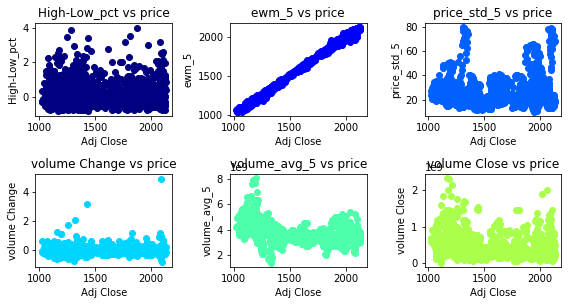

In [9]:
jet= plt.get_cmap('jet')
colors = iter(jet(np.linspace(0,1,10)))
 
def correlation(df,variables, n_rows, n_cols):
    fig = plt.figure(figsize=(8,6))
    #fig = plt.figure(figsize=(14,9))
    for i, var in enumerate(variables):
        ax = fig.add_subplot(n_rows,n_cols,i+1)
        asset = df.loc[:,var]
        ax.scatter(df["Adj Close"], asset, c = next(colors))
        ax.set_xlabel("Adj Close")
        ax.set_ylabel("{}".format(var))
        ax.set_title(var +" vs price")
    fig.tight_layout() 
    plt.show()
        
# Take the name of the last 6 columns of the SPY_data which are the model features
variables = SPY_data.columns[-6:]  
 
correlation(SPY_data,variables,3,3)


In [10]:
SPY_data.corr()['Adj Close'].loc[variables]

High-Low_pct    -0.010328
ewm_5            0.998513
price_std_5      0.100524
volume Change   -0.005446
volume_avg_5    -0.485734
volume Close    -0.241898
Name: Adj Close, dtype: float64

In [11]:
SPY_data.isnull().sum().loc[variables]
# To train the model is necessary to drop any missing value in the dataset.

SPY_data = SPY_data.dropna(axis=0)

# Generate the train and test sets

In [14]:
X = SPY_data.drop(['Adj Close'],axis='columns')
X.head()

Open         High          Low        Close        Volume  \
Date                                                                           
2015-10-23  2058.189941  2079.739990  2058.189941  2075.149902  4.108460e+09   
2015-10-22  2021.880005  2055.199951  2021.880005  2052.510010  4.430850e+09   
2015-10-21  2033.469971  2037.969971  2017.219971  2018.939941  3.627790e+09   
2015-10-20  2033.130005  2039.119995  2026.609985  2030.770020  3.331500e+09   
2015-10-19  2031.729980  2034.449951  2022.310059  2033.660034  3.287320e+09   

            High-Low_pct        ewm_5  price_std_5  volume Change  \
Date                                                                
2015-10-23      1.502949  2078.965230    19.662414       0.213438   
2015-10-22      0.546166  2077.693450    19.676415       0.078470   
2015-10-21     -0.377250  2069.298950    20.183769      -0.181243   
2015-10-20     -0.397108  2052.512588    22.378095      -0.081672   
2015-10-19     -0.029586  2045.265058    23.970453      -0.013261   

            volume_avg_5  volume Close  
Date                                    
2015-10-23  4.113186e+09  4.778334e+08  
2015-10-22  4.083638e+09  4.713022e+08  
2015-10-21  4.168020e+09  4.919039e+08  
2015-10-20  3.953956e+09  4.329012e+08  
2015-10-19  3.776880e+09  4.772727e+08

In [15]:
Y = SPY_data['Adj Close']
Y.head()

Date
2015-10-23    2075.149902
2015-10-22    2052.510010
2015-10-21    2018.939941
2015-10-20    2030.770020
2015-10-19    2033.660034
Name: Adj Close, dtype: float64

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.20,random_state=10)

In [17]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,Y_train)
lr_clf.score(X_test,Y_test)

1.0